# CNN - fashion_mnist

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [ ]:
train_input.shape, test_input.shape    # 6만개 28*28

((60000, 28, 28), (10000, 28, 28))

In [ ]:
train_target.shape, test_target.shape

((60000,), (10000,))

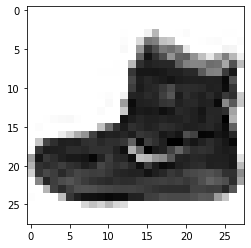

In [ ]:
plt.imshow(train_input[0], cmap='gray_r')

In [ ]:
# CNN : 사진 데이터
# 데이터 전처리

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255    # reshape(-1자동,가로,세로,채널)
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255

In [ ]:
train_scaled.shape    # 1채널 # RGB사진이면 3

(60000, 28, 28, 1)

In [ ]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2)  # 검증데이터 

In [ ]:
model = keras.Sequential()    # 인공신경망을 그리기위한 도화지

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(28, 28, 1)))    # 한 사진으로 32개 특징사진 생성  # 커널사이즈 3*3필터  # same패딩  # input_shape
model.add(keras.layers.MaxPooling2D((2,2)))    # MaxPooling2D  # 특징 잡으면서 크기 줄이기 - 속도향상  # (2,2) = 2    # 28*28 -> 14*14

model.add(keras.layers.Flatten())    # 1차원으로 늘이기
model.add(keras.layers.Dense(100, activation = 'relu'))    # 은닉층
model.add(keras.layers.Dropout(0.4))    # 드롭아웃
model.add(keras.layers.Dense(10, activation = 'softmax'))

# model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

checkpoint = keras.callbacks.ModelCheckpoint('best.h5')

early = keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)

history = model.fit(train_scaled, train_target,
                    epochs = 100,
                    validation_data = (val_scaled, val_target),
                    callbacks = [checkpoint, early])

Epoch 1/100
1500/1500 [==============================] - 37s 24ms/step - loss: 0.5136 - accuracy: 0.8179 - val_loss: 0.3447 - val_accuracy: 0.8770
Epoch 2/100
1500/1500 [==============================] - 40s 26ms/step - loss: 0.3457 - accuracy: 0.8764 - val_loss: 0.3097 - val_accuracy: 0.8902
Epoch 3/100
1500/1500 [==============================] - 34s 22ms/step - loss: 0.3034 - accuracy: 0.8907 - val_loss: 0.2669 - val_accuracy: 0.9038
Epoch 4/100
1500/1500 [==============================] - 34s 23ms/step - loss: 0.2749 - accuracy: 0.9007 - val_loss: 0.2754 - val_accuracy: 0.8950
Epoch 5/100
1500/1500 [==============================] - 34s 23ms/step - loss: 0.2559 - accuracy: 0.9051 - val_loss: 0.2523 - val_accuracy: 0.9074
Epoch 6/100
1500/1500 [==============================] - 33s 22ms/step - loss: 0.2330 - accuracy: 0.9138 - val_loss: 0.2502 - val_accuracy: 0.9078
Epoch 7/100
1500/1500 [==============================] - 33s 22ms/step - loss: 0.2198 - accuracy: 0.9188 - val_loss: 0

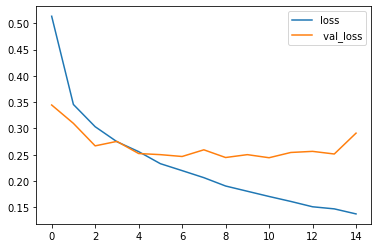

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss',' val_loss'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 100)               627300    
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                        

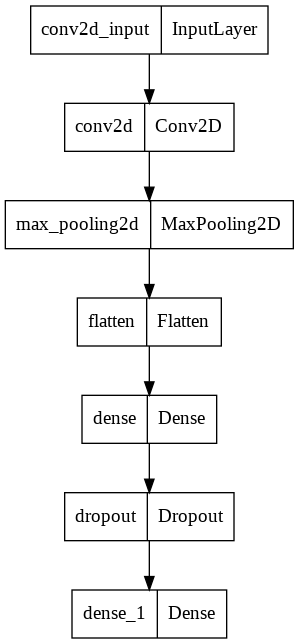

In [ ]:
keras.utils.plot_model(model)

In [ ]:
model1 = keras.Sequential()                                                                                                          # 인공신경망을 그리기위한 도화지

model1.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(28, 28, 1)))    # 한 사진으로 32개 특징사진 생성  # 커널사이즈 3*3필터  # same패딩  # input_shape
model1.add(keras.layers.MaxPooling2D((2,2)))    # MaxPooling2D  # 특징 잡으면서 크기 줄이기 - 속도향상  # (2,2) = 2  # 28*28 -> 14*14

model1.add(keras.layers.Flatten())    # 1차원으로 늘이기
model1.add(keras.layers.Dense(100, activation = 'relu'))    # 은닉층
model1.add(keras.layers.Dropout(0.4))    # 드롭아웃
model1.add(keras.layers.Dense(10, activation = 'softmax'))

model1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

checkpoint = keras.callbacks.ModelCheckpoint('best.h5')

early = keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)

history = model1.fit(train_scaled, train_target,
                    epochs = 100,
                    validation_data = (val_scaled, val_target),
                    callbacks = [checkpoint, early])

Epoch 1/100
1500/1500 [==============================] - 35s 23ms/step - loss: 0.5086 - accuracy: 0.8193 - val_loss: 0.3219 - val_accuracy: 0.8868
Epoch 2/100
1500/1500 [==============================] - 34s 23ms/step - loss: 0.3455 - accuracy: 0.8763 - val_loss: 0.2845 - val_accuracy: 0.8968
Epoch 3/100
1500/1500 [==============================] - 34s 22ms/step - loss: 0.3034 - accuracy: 0.8899 - val_loss: 0.2663 - val_accuracy: 0.9018
Epoch 4/100
1500/1500 [==============================] - 34s 22ms/step - loss: 0.2781 - accuracy: 0.8982 - val_loss: 0.2634 - val_accuracy: 0.9032
Epoch 5/100
1500/1500 [==============================] - 34s 22ms/step - loss: 0.2548 - accuracy: 0.9056 - val_loss: 0.2461 - val_accuracy: 0.9097
Epoch 6/100
1500/1500 [==============================] - 34s 23ms/step - loss: 0.2381 - accuracy: 0.9131 - val_loss: 0.2448 - val_accuracy: 0.9117
Epoch 7/100
1500/1500 [==============================] - 34s 22ms/step - loss: 0.2250 - accuracy: 0.9149 - val_loss: 0

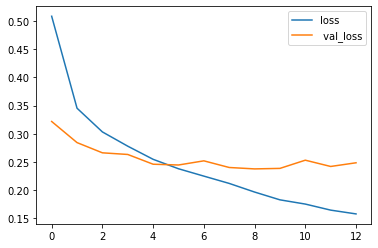

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss',' val_loss'])

## 컨벌루전 층 추가

In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255 
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2)

model = keras.Sequential() # 인공신경망을 그리기위한 도화지
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation = 'relu', padding = 'same', input_shape = (28, 28, 1)))
model.add(keras.layers.MaxPooling2D(2)) # 특징이 잡힌상태로 줄어들기 때문에 속도가 훨씬 빨라집니다.
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation = 'relu', padding = 'same'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

checkpoint = keras.callbacks.ModelCheckpoint('best.h5')
early = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(train_scaled, train_target,
                    epochs = 100,
                    validation_data = (val_scaled, val_target),
                    callbacks = [checkpoint, early])

Epoch 1/100
1500/1500 [==============================] - 68s 45ms/step - loss: 0.5041 - accuracy: 0.8225 - val_loss: 0.4245 - val_accuracy: 0.8447
Epoch 2/100
1500/1500 [==============================] - 64s 43ms/step - loss: 0.3310 - accuracy: 0.8846 - val_loss: 0.3029 - val_accuracy: 0.8909
Epoch 3/100
1500/1500 [==============================] - 65s 43ms/step - loss: 0.2940 - accuracy: 0.8966 - val_loss: 0.2836 - val_accuracy: 0.8988
Epoch 4/100
1500/1500 [==============================] - 65s 43ms/step - loss: 0.2792 - accuracy: 0.9035 - val_loss: 0.2751 - val_accuracy: 0.9052
Epoch 5/100
1500/1500 [==============================] - 64s 43ms/step - loss: 0.2759 - accuracy: 0.9059 - val_loss: 0.2854 - val_accuracy: 0.9065
Epoch 6/100
1500/1500 [==============================] - 64s 43ms/step - loss: 0.2736 - accuracy: 0.9070 - val_loss: 0.3057 - val_accuracy: 0.9035
Epoch 7/100
1500/1500 [==============================] - 64s 42ms/step - loss: 0.2717 - accuracy: 0.9089 - val_loss: 0

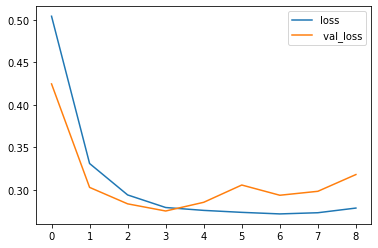

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss',' val_loss'])

# RNN - 주가 크롤링 + 예측


In [1]:
import pandas as pd    # 데이터프레임, 파일 읽기/저장
import numpy as np
import requests        # 요청 라이브러리
from bs4 import BeautifulSoup    # 파이썬 HTML을 다루는 라이브러리
import time            # 시간 조절
from tqdm import tqdm    # for문의 진행상황 확인

header = {'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5)'}

# 네이버금융 - 종목 선택 - 시세 - 주소창 : sise.naver -> sise_day.naver
res = requests.get("https://finance.naver.com/item/sise_day.naver?code=035720&page=1", headers = header) # 카카오
html = BeautifulSoup(res.text)

# table = html.select_one("table.type2")    # 테이블 확인용
# df = pd.read_html(str(table))[0]
# df = df[ df['날짜'].notnull() ]

last_page = int( html.select_one("td.pgRR > a")["href"].split("=")[-1] )
last_page

total = []

for n in tqdm(range(1, last_page + 1)):

    res = requests.get(f"https://finance.naver.com/item/sise_day.naver?code=035720&page={n}", headers= header)
    html = BeautifulSoup(res.text)

    table = html.select_one("table.type2")
    table = pd.read_html(str(table))[0]
    table = table[ table['날짜'].notnull() ]

    total.append(table)
    time.sleep(0.2)

df = pd.concat(total, ignore_index=True)    # 모든 표 합치기

df = df[::-1]    # 데이터프레임 역순으로 (날짜 오름차순)

df.to_excel('카카오 주가.xlsx')

100%|██████████| 552/552 [07:23<00:00,  1.24it/s]


In [8]:
df = pd.read_excel("카카오 주가.xlsx", index_col=0)
dfx = df[['종가', '시가', '고가', '저가', '거래량']]
dfx

,종가,시가,고가,저가,거래량
5519,11200,11200,11200,11200,12
5518,14000,14000,14000,14000,405
5517,15650,15650,15650,15650,214
5516,17500,17500,17500,17500,191
5515,19600,19600,19600,19600,772
...,...,...,...,...,...
5,88500,87300,89200,87000,1435047
4,89000,88600,91900,88300,1865993
3,84300,86500,86600,84100,3592237
2,84100,84000,85000,82800,1533542


In [9]:
dfx = dfx.to_numpy()    # 문제지 행렬화
dfx

array([[  11200,   11200,   11200,   11200,      12],
       [  14000,   14000,   14000,   14000,     405],
       [  15650,   15650,   15650,   15650,     214],
       ...,
       [  84300,   86500,   86600,   84100, 3592237],
       [  84100,   84000,   85000,   82800, 1533542],
       [  83600,   82000,   84300,   81900, 2390050]])

In [10]:
dfx.shape

(5519, 5)

In [11]:
# 0~1 범위로 문제지 정규화
from sklearn.preprocessing import MinMaxScaler

a = MinMaxScaler()
a.fit(dfx)
dfx = a.transform(dfx)
dfx    # 문제지

array([[0.00000000e+00, 2.02166065e-02, 1.99643494e-02, 2.03266788e-02,
        6.35083673e-07],
       [5.12070227e-03, 2.52707581e-02, 2.49554367e-02, 2.54083485e-02,
        2.14340740e-05],
       [8.13825896e-03, 2.82490975e-02, 2.78966132e-02, 2.84029038e-02,
        1.13256588e-05],
       ...,
       [1.33686906e-01, 1.56137184e-01, 1.54367201e-01, 1.52631579e-01,
        1.90114256e-01],
       [1.33321141e-01, 1.51624549e-01, 1.51515152e-01, 1.50272232e-01,
        8.11606239e-02],
       [1.32406730e-01, 1.48014440e-01, 1.50267380e-01, 1.48638838e-01,
        1.26490144e-01]])

In [12]:
dfx.shape

(5519, 5)

In [13]:
dfy = dfx[:, 0]    # 모든 행에 대해서 0번째 열 (종가) - to_numpy()로 행렬화 되어있는 경우 df[행인덱스, 열인덱스] 로 접근하기 때문
dfy    # 정답지

array([0.        , 0.0051207 , 0.00813826, ..., 0.13368691, 0.13332114,
       0.13240673])

In [14]:
dfy.shape

(5519,)

In [15]:
# 일주일 데이터로 다음날 종가 예측을 위한 데이터셋 생성
# 문제집 : 1/1 ~ 1/10
# 정답지 : 1/11의 종가

data_x = []
data_y = []

size = 10    # 10일 단위로 학습
for i in range(len(dfx) - size):
    data_x.append( dfx[i : i + size] )
    data_y.append( dfy[i + size] )

In [16]:
data_x  # 리스트임

[array([[0.00000000e+00, 2.02166065e-02, 1.99643494e-02, 2.03266788e-02,
         6.35083673e-07],
        [5.12070227e-03, 2.52707581e-02, 2.49554367e-02, 2.54083485e-02,
         2.14340740e-05],
        [8.13825896e-03, 2.82490975e-02, 2.78966132e-02, 2.84029038e-02,
         1.13256588e-05],
        [1.15215801e-02, 3.15884477e-02, 3.11942959e-02, 3.17604356e-02,
         1.01084151e-05],
        [1.53621068e-02, 3.53790614e-02, 3.49376114e-02, 3.55716878e-02,
         4.08570497e-05],
        [1.96598391e-02, 3.96209386e-02, 3.91265597e-02, 3.98366606e-02,
         1.33896808e-05],
        [2.44147769e-02, 4.43140794e-02, 4.37611408e-02, 4.45553539e-02,
         1.05318042e-05],
        [2.97183614e-02, 4.95487365e-02, 4.89304813e-02, 4.98185118e-02,
         6.29791309e-06],
        [3.56620337e-02, 5.54151625e-02, 5.47237077e-02, 5.57168784e-02,
         1.19607425e-05],
        [4.23372348e-02, 6.20036101e-02, 6.12299465e-02, 6.23411978e-02,
         3.91634932e-06]]),
 array([

In [17]:
data_x.shape

AttributeError: ignored

In [21]:
size(data_x)

TypeError: ignored

In [22]:
data_y

[0.04983540599853695,
 0.05824798829553768,
 0.06766642282370154,
 0.07809070958302854,
 0.08979517190929041,
 0.10296269202633504,
 0.11777615215801025,
 0.134235552304316,
 0.15270665691294805,
 0.17337234820775418,
 0.19623262618873444,
 0.2218361375274323,
 0.2501828822238478,
 0.2821872713972202,
 0.3178493050475494,
 0.33430870519385514,
 0.3763716166788588,
 0.38185808339429406,
 0.429407461594733,
 0.4833577176298464,
 0.5437088514996342,
 0.6113752743233357,
 0.686356986100951,
 0.6022311631309436,
 0.5281638624725676,
 0.46232626188734455,
 0.40471836137527434,
 0.4092904169714704,
 0.46049743964886614,
 0.4312362838332114,
 0.377286027798098,
 0.40654718361375275,
 0.4577542062911485,
 0.5144476956839794,
 0.45318215069495243,
 0.4934162399414777,
 0.48244330651060713,
 0.4787856620336503,
 0.4193489392831017,
 0.38185808339429406,
 0.33430870519385514,
 0.3763716166788588,
 0.42392099487929774,
 0.4897585954645209,
 0.2648134601316752,
 0.298646671543526,
 0.336137527432333

In [23]:
# 훈련데이터 시험데이터 만들기                                      # 10일차 강의 01:04:00 확인
# 모듈로 나누면 순서가 섞여서 직접 나누기

train_size = int( len(data_y) * 0.8 )    # 80%를 훈련데이터로
train_size

train_x = np.array( data_x[:train_size] )
train_y = np.array( data_y[:train_size] )

test_x = np.array( data_x[train_size:] )
test_y = np.array( data_y[train_size:] )

In [24]:
from tensorflow import keras

model = keras.Sequential()
model.add( keras.layers.SimpleRNN(10, activation = 'relu', input_shape = (10, 5)) )    # 10행 5열
model.add( keras.layers.Dropout(0.1) )
model.add( keras.layers.Dense(1) )    # 그냥 예측이므로 시그모이드, 소프트맥스 아님

model.compile(optimizer='adam', loss = 'mean_squared_error')    # 최적화함수, 오차계산방법

model.fit(train_x, train_y, epochs = 100, batch_size = 32)

Epoch 1/100
138/138 [==============================] - 3s 5ms/step - loss: 0.0013
Epoch 2/100
138/138 [==============================] - 1s 5ms/step - loss: 5.5553e-04
Epoch 3/100
138/138 [==============================] - 1s 5ms/step - loss: 3.9427e-04
Epoch 4/100
138/138 [==============================] - 1s 5ms/step - loss: 3.4227e-04
Epoch 5/100
138/138 [==============================] - 1s 5ms/step - loss: 3.1792e-04
Epoch 6/100
138/138 [==============================] - 1s 5ms/step - loss: 2.5678e-04
Epoch 7/100
138/138 [==============================] - 1s 5ms/step - loss: 2.5179e-04
Epoch 8/100
138/138 [==============================] - 1s 5ms/step - loss: 2.2779e-04
Epoch 9/100
138/138 [==============================] - 1s 5ms/step - loss: 2.1078e-04
Epoch 10/100
138/138 [==============================] - 1s 5ms/step - loss: 2.0243e-04
Epoch 11/100
138/138 [==============================] - 1s 5ms/step - loss: 2.0081e-04
Epoch 12/100
138/138 [==============================] - 

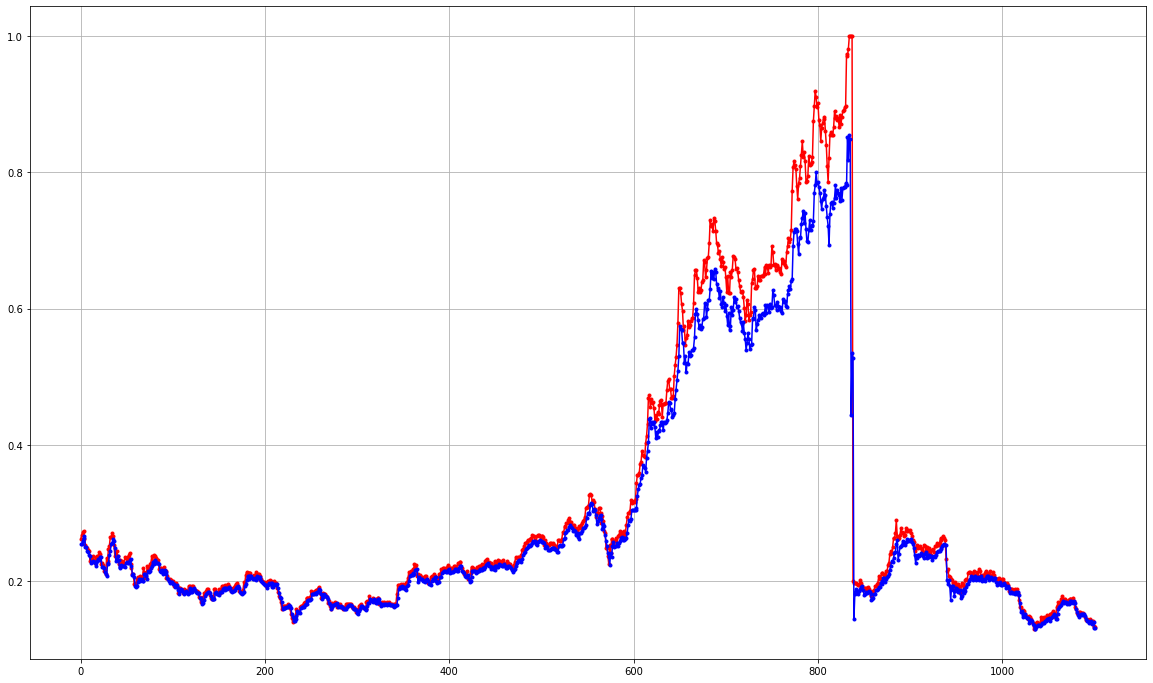

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,12))
plt.grid(True)

plt.plot( test_y, color = 'red', marker='.', label = 'real' )
plt.plot( model.predict(test_x), color = 'blue', marker='.', label = 'predicted' )

## 이전 n일 데이터로 다음날 종가 예측하기

In [26]:
# 오늘부터 10일간의 데이터 알려주면 다음 종가 예측
df['종가'].iloc[-1]    # 오늘 종가

83600

In [27]:
dfy[-1]    # 오늘 종가 전처리한거

0.13240673006583759

In [28]:
model.predict(test_x)[-1][0]    # 내일 종가 예측

0.13069698

In [29]:
df['종가'].iloc[-1] * (model.predict(test_x)[-1][0] / dfy[-1])    # 오늘종가 * 내일등락률 = 내일 종가

82520.48594444497